# Overview
This notebook is used to create a multi-class classification model that predicts the type of dry beans based on 16 features (12 dimensions and 4 shape forms). The dataset used is the "Dry Bean Dataset" which is available at https://archive.ics.uci.edu/dataset/602/dry+bean+dataset. Here is the UCI dataset description of the dataset:

*Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.*

More information about the dataset can be found in the paper "Multiclass classification of dry beans using computer vision and machine learning techniques" by Murat Koklu and Ilker Ali Ozkan in Computers and Electronics in Agriculture, 2020.

The dataset contains 13611 rows and 17 columns. The columns are as follows:
1. Area (integer, denote A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (float, denote P): Bean circumference is defined as the length of its border.
3. MajorAxisLength (float, denote L): The distance between the ends of the longest line that can be drawn from a bean.
4. MinorAxisLength (float, denote l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. AspectRatio (float, denote K): Defines the relationship between MajorAxisLength and MinorAxisLength. $K = \frac{L}{l}$
6. Eccentricity (float, denote Ec): Eccentricity of the ellipse having the same moments as the region.
7. ConvexArea (integer, denote C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. EquivDiameter (float, denote Ed): Equivalent diameter. The diameter of a circle having the same area as a bean seed area. $d = \sqrt{\frac{4*A}{\pi}}$
9. Extent (float, denote Ex): The ratio of the pixels in the bounding box to the bean area.
$$Ex = \frac{A}{A_B} where A_B = AreaOfBoundingRectangle$$
10. Solidity (float, denote S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans. $S = \frac{A}{C}$
11. Roundness (float, denote R): Calculated with the following formula: $R = \frac{4 \pi A}{P^2}$.
12. Compactness (float, denote CO): Measures the roundness of an object. $CO = \frac{Ed}{L}$
13. ShapeFactor1 (float, denote SF1): Defines the relationship between MajorAxisLength and Area. $\frac{L}{A}$
14. ShapeFactor2 (float, denote SF2): Defines the relationship between MinorAxisLength and Area. $\frac{l}{A}$
15. ShapeFactor3 (float, denote SF3): Defines the relationship between Area and area of a circle having the same MajorAxisLength as the bean. $\frac{A}{(\frac{L}{2}*\frac{L}{2}*\pi)}$
16. ShapeFactor4 (float, denote SF4): Defines the relationship between Area and area of a circle having the same MinorAxisLength as the bean. $\frac{A}{(\frac{L}{2}*\frac{l}{2}*\pi)}$
17. Class (string): Type of a bean. Value of class variable is one of: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA.

Here are some descriptions of each class, which might help us determine the features that are important for classification:


**BARBUNYA**; Beige-colored background with red stripes or variegated, speckled color, its seeds are large, physical shape is oval close to the round.

**BOMBAY**; It is white in color, its seeds are very big and its physical structure is oval and bulging.

**CALI**; It is white in color, its seeds are slightly plump and slightly larger than dry beans and in shape of kidney.

**DERMASON**; This type of dry beans, which are fuller flat, is white in color and one end is round and the other ends are round.

**HOROZ**; Dry beans of this type are long, cylindrical, white in color and generally medium in size.

**SEKER**; Large seeds, white in color, physical shape is round.

**SIRA**; Its seeds are small, white in color, physical structure is flat, one end is flat, and the other end is round.

The model is created using the following steps:
1. Data Exploration
2. Data Preprocessing
3. Model Training and Evaluation

# Install Python Packages/Libraries

Install the specified Python packages. Here's a breakdown of each package:

`joblib`: A set of tools for pipelining Python jobs. It provides utilities for saving and loading Python objects that make it possible to save scikit-learn models in a format that can be used in production.

`matplotlib`: A plotting library for creating visualizations in Python. It is often used in conjunction with other libraries for data analysis and machine learning.

`numpy`: A fundamental package for scientific computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

`pandas`: A powerful data manipulation and analysis library. It provides data structures for efficiently storing and manipulating large datasets.

`seaborn`: A statistical data visualization library based on Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.

`scikit-learn`: A machine learning library that provides simple and efficient tools for data analysis and modeling. It includes various algorithms for classification, regression, clustering, and more.


In [1]:
%pip install joblib==1.3.2 matplotlib==3.7.1 numpy==1.23.5 pandas==1.5.3 plotly==5.15.0 scikit-learn==1.2.2 seaborn==0.13.1 "nbformat>=4.2.0"

Note: you may need to restart the kernel to use updated packages.


# Import Packages/Libraries

In addition to the packages/libraries installed above, we will also imported

`typing`: A module that provides support for type hints. Type hints allow you to specify the type of a variable, function parameter, or return value. This helps improve the readability of your code and allows you to catch errors early.

In [2]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer


# Data Exploration

We want to explore the data to get a better understanding of the dataset. We will use the pandas library to load the dataset into a pandas DataFrame. A DataFrame is a two-dimensional data structure that can store data of different types (including characters, integers, floating point values, categorical data, and more) in columns. It is similar to a spreadsheet or an SQL table. The DataFrame object also has powerful built-in methods for exploring and manipulating these data sets. We will first take a look at the structure of the dataset. Then, we want to explore the data to see if there are any missing values and to see if there are any skewness and outliers. We also want to see if there are any correlations between the features and the target variable. We will use the pandas library to load the dataset and the matplotlib and seaborn library to plot the data.

Load the `Dry_Bean_Dataset.csv` file into a Pandas DataFrame

In [3]:
csv_path = './dataset/dry_bean/Dry_Bean_Dataset.csv'
df = pd.read_csv(csv_path) # Read dataset into dataframe

Display the first 5 rows of the dataframe using `head()` method of the dataframe.

We can see that the data contains 17 columns where the first 16 columns are numerical values and the last column is a categorical value. The target variable is the `Class` column.

In [4]:
df.head(5) # Show the first 5 rows of dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Obtain a concise summary of the dataframe. The `info()` method provides information about the dataframe, including the index range, the data types of each column, the number of non-null values, and memory usage.

In [5]:
df.info() # Show the info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

we can retrieve the columns of the dataframe using the `columns` attribute of the dataframe.

In [6]:
df.columns # Show the columns of dataframe

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

Retrieve the dimensions (rows, columns) of the dataframe using the `shape` attribute of the dataframe.

In [7]:
df.shape # Retrieve the number of rows and columns

(13611, 17)

Check and handles missing values in the Pandas DataFrame.

We see that their is no missing values in the dataset.

In [8]:
# Check the number of missing values in each column
print('Missing values in each column:\n', df.isnull().sum(), sep='')
print('Original data shape: ', df.shape)

Missing values in each column:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64
Original data shape:  (13611, 17)


Check the number of unique values in each column of dataframe using the `nunique()` method of the dataframe.

In [9]:
# Check the number of unique values in each column
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

We will create a list to keep track of the feature columns and a string variable for the target column. This will be useful when we visualize the data.

In [10]:
# Create a variable to store the target column name
target = 'Class'

# Create a list to keep track of the feature columns
all_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

We will display pie charts to visualize the distribution of the target `Class` column using the `plot.pie()` method of the dataframe.

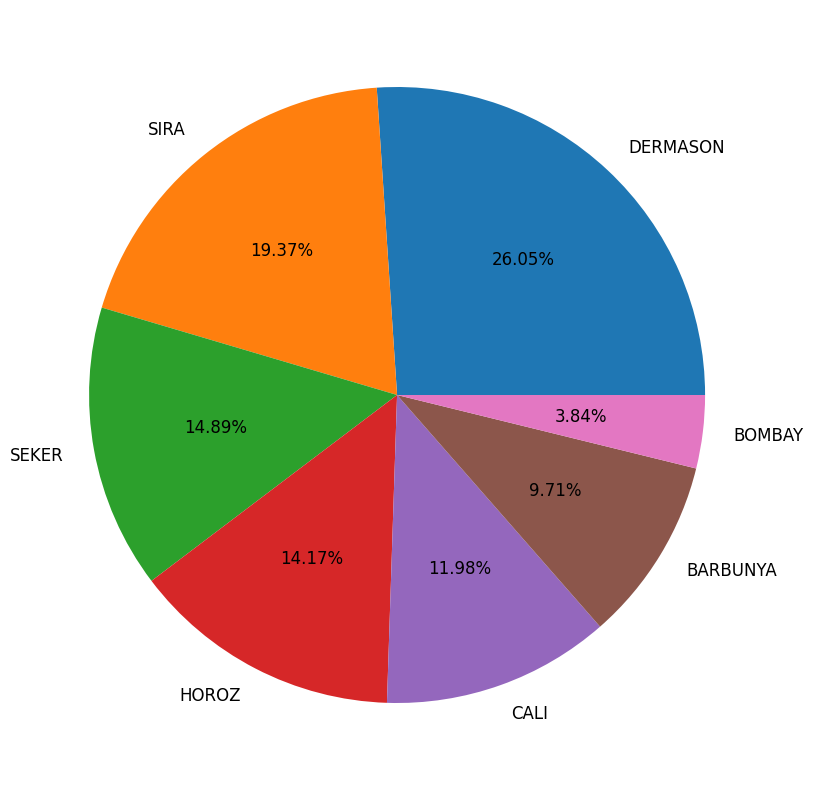

In [11]:
# TODO: set the figure size and background color to white in case your editor GUI uses a dark theme (fill in the blank)
plt.figure(figsize=(10,10), facecolor="white")

# Show the percentage of each type of bean using a pie chart
# plot.pie() plots a pie chart on the figure attached to the current cell
# autopct='%1.2f%%' shows the percentage of each category with 2 decimal places
df[target].value_counts().plot.pie(autopct='%1.2f%%', fontsize=12)
plt.ylabel('')

plt.show()

We will use histograms to visualize the distribution of numerical feature columns using the `hist()` method of the dataframe.

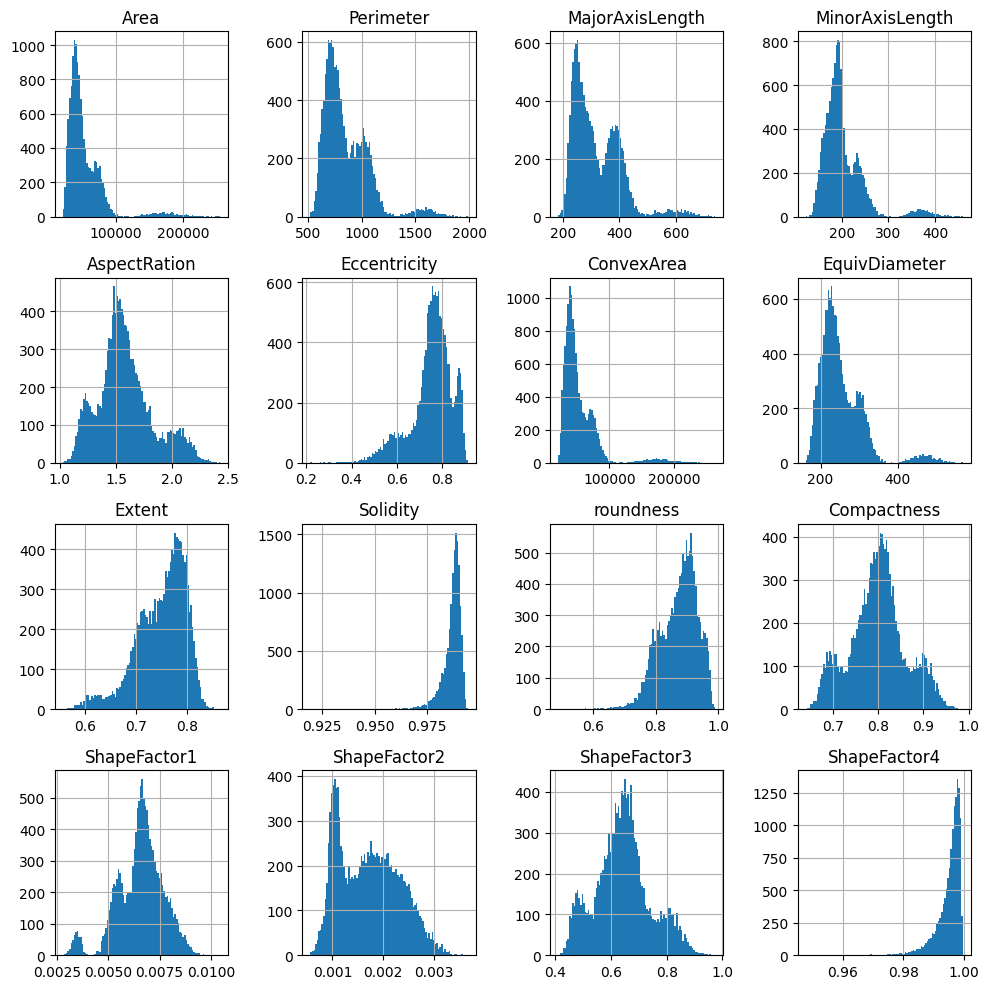

In [12]:
# Display the distribution of each feature
df[all_features].hist(figsize=(10, 10), bins=100)

plt.tight_layout()
plt.show()

Check for correlation between the features using the `corr()` method of the dataframe. The `corr()` method computes pairwise correlation of columns, excluding NA/null values. The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation; when the coefficient is close to -1, it means that there is a strong negative correlation; when it is close to zero, it means that there is no linear correlation.

Notice that the `Class` column is not included in the correlation matrix because it is a categorical value.

We will look for highly correlated features and determine which features to keep and which to drop.

/var/folders/3w/dx98vqrj12b47sl1fz6810rh0000gn/T/ipykernel_47001/2904378107.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


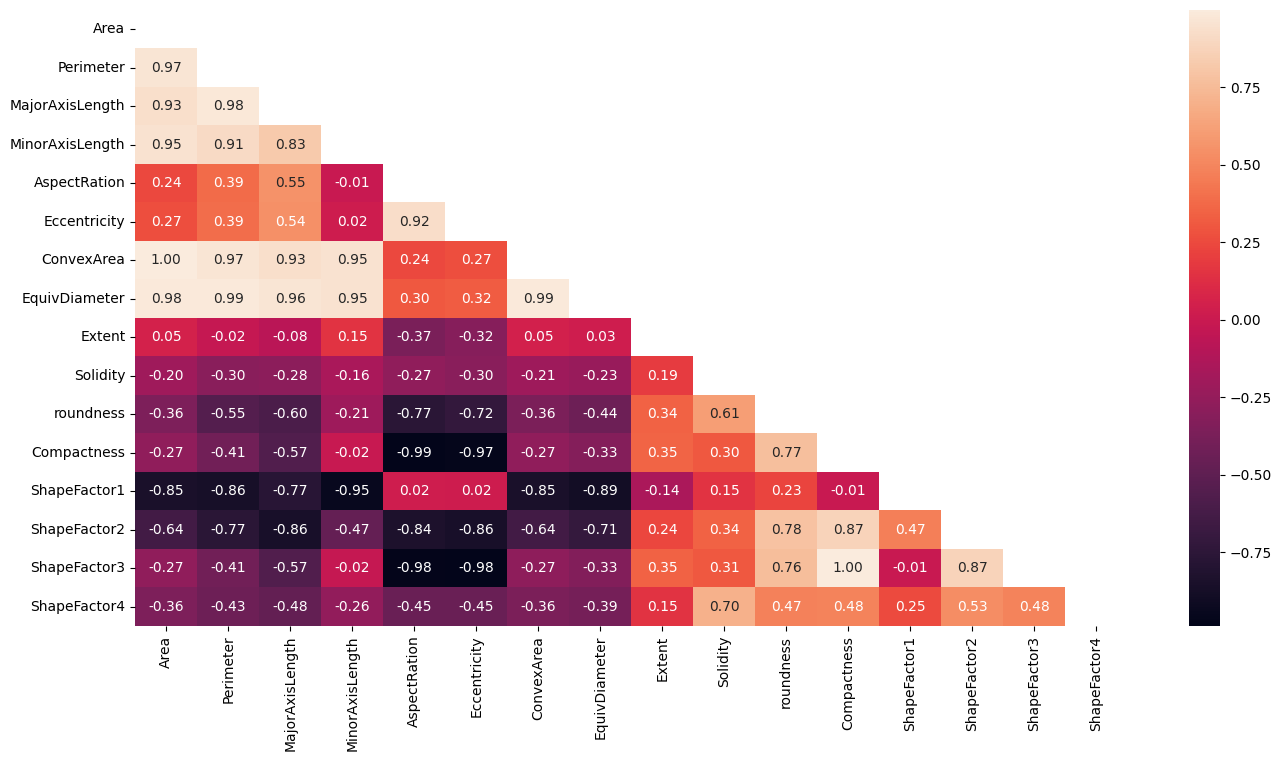

In [13]:
# Create a figure
plt.figure(figsize=(16, 8))

# TODO: compute the correlation matrix using the `.corr()` method (fill in the blank)
correlation_matrix = df.corr()

# Create a mask to block the upper triangle of the correlation matrix
# as it is a mirror image of the lower triangle
# use `np.triu()` to create an upper triangle matrix of 1s and 0s
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# TODO: plot the heatmap using seaborn's `heatmap()` function
# set `annot=True` to show the correlation values on the heatmap
# set `fmt='.2f'` to round the correlation values to 2 decimal places
# set `mask=mask` to block the upper triangle of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', mask=mask)


# show the plot
plt.show()


A violin plot is used to visualize the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data. We will use the `violinplot()` method of the seaborn library to plot the violin plot.

We will use the violin plot to help us determine which features to keep and which to drop. We will drop the features that have similar distributions for all the classes. We will keep the features that have different distributions for different classes.

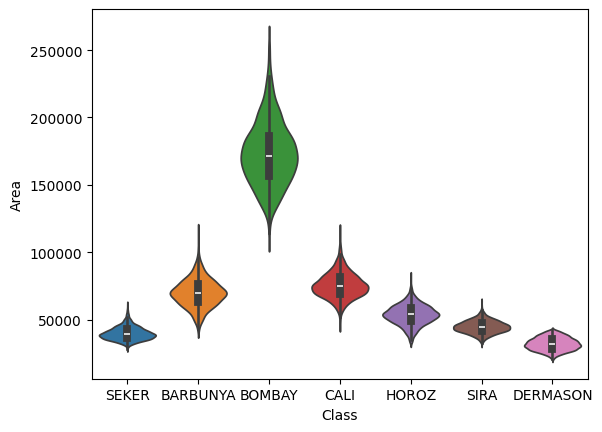

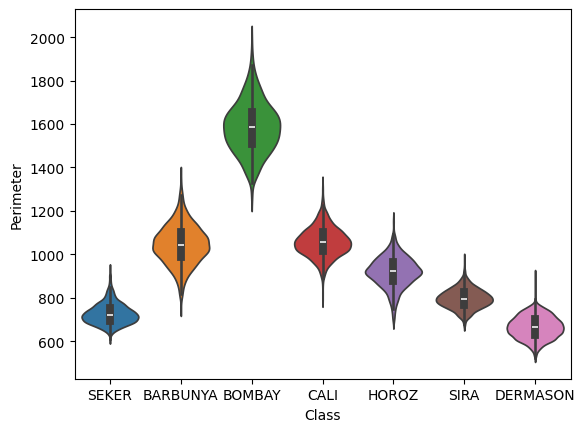

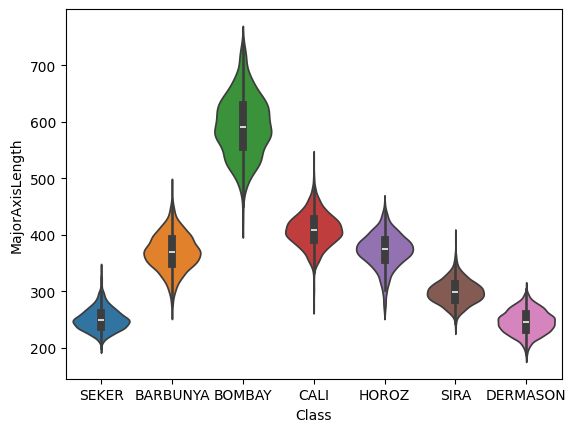

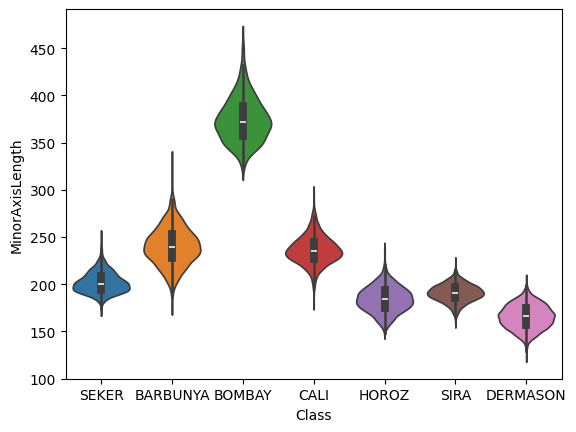

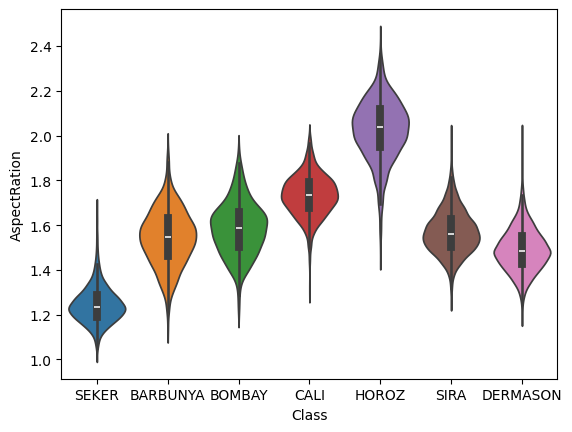

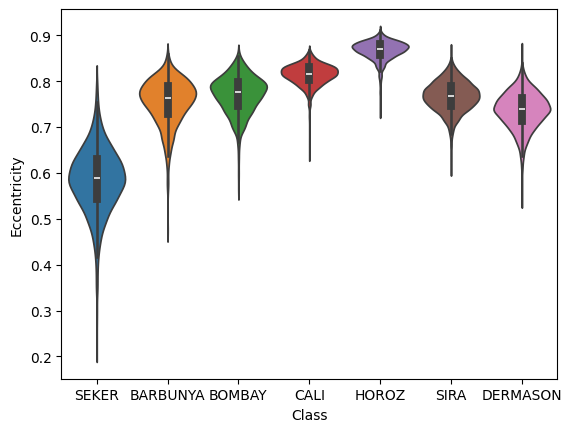

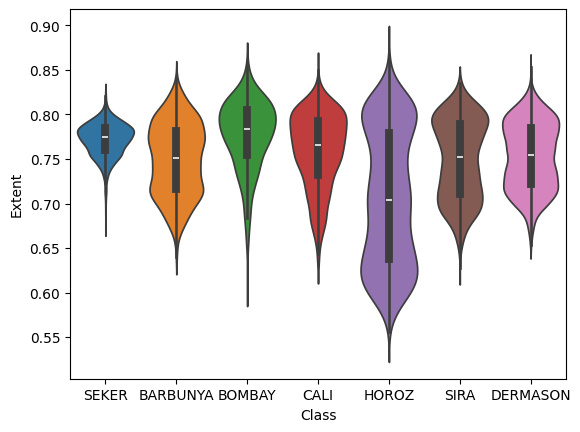

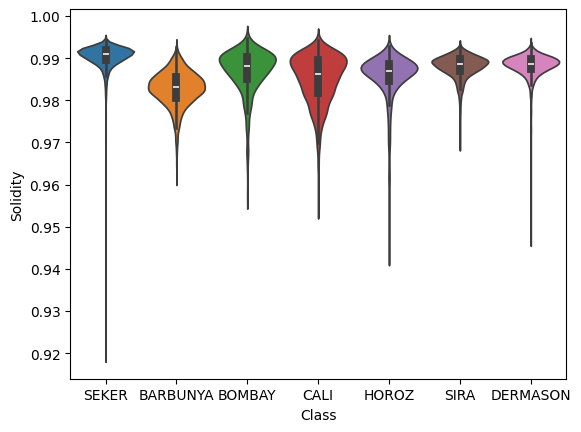

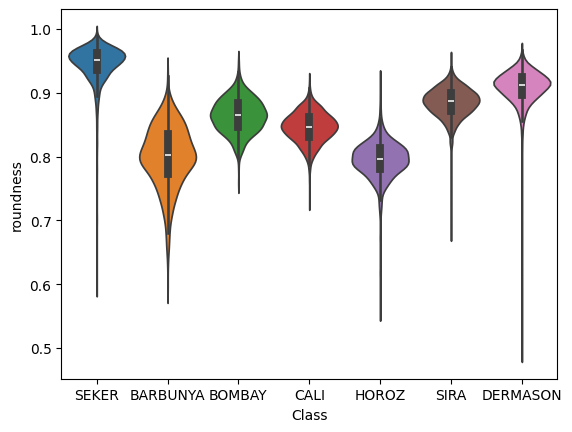

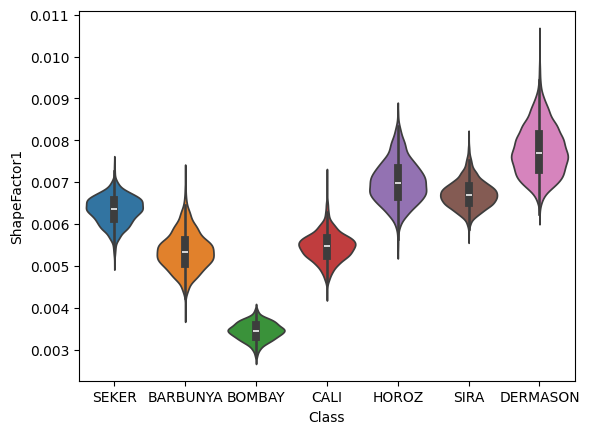

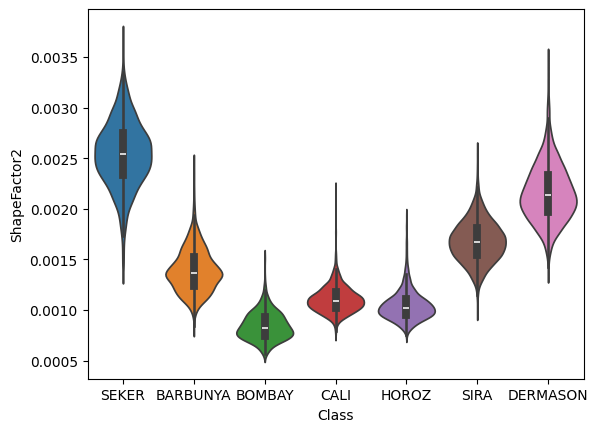

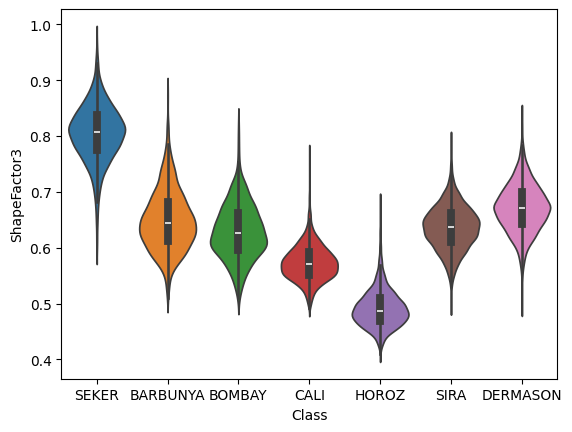

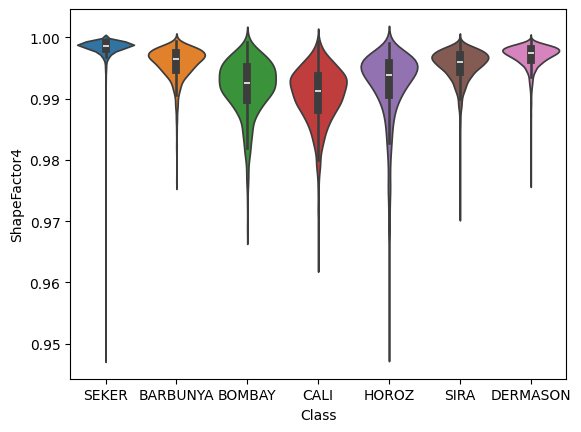

In [14]:
# TODO: sns.violinplot() plots a violin plot on the figure attached to the current cell (fill in the blank)
# x=label specifies the column to use for x axis
# y=feature specifies the column to use for y axis
# hue=label specifies the column to use for grouping
for feature in ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
                'Eccentricity', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2',
                'ShapeFactor3', 'ShapeFactor4']:
    sns.violinplot(x="Class", y= feature, hue=target, data=df)

    plt.show()



# Data Preprocessing

Data splitting. We are given one CSV file containing all the data. We will split the data into training, validation, and test sets.
- The training dataset is used to train the machine learning model. The model learns the patterns and relationships within the data from this set. The model adjusts its parameters to minimize the difference between its predictions and the ground truth values provided with this dataset.
- The validation dataset is used to assess the model's performance during training and guide the adjustment of the hyperparameters. Hyperparameters are training/model configurations that the programmer can manually adjust. Since the validation dataset is an independent dataset not used in directly tuning the model's internal parameters, we can use it to assess whether a model is under-fitting or over-fitting.
- The test dataset is kept separate from both the training and validation sets. It is used to assess the final performance of the trained model on unseen data. The test set provides an unbiased evaluation of the model's generalization to new, previously unseen examples.

Building pipelines to preprocess the data. The preprocessing pipeline provides a systematic and efficient way to streamline and automate the data preprocessing steps. It ensures consistent application of preprocessing steps to training, validation, and test data, enhancing model reproducibility, readability, and ease of deployment. In this section, we will build a preprocessing pipeline to perform the following steps:
 - Use log transformation to reduce skewness
 - Standardize the data using StandardScaler
 - drop low correlation features

Reload the data into a Pandas DataFrame to reset the changes made to the dataframe in the previous section. Additionally, we will declare variables to store all feature columns and the label (target) column. We will use these variables to select the columns from the dataframe in the preprocessing pipeline.

In [15]:
# TODO: reload the dataset
csv_path = '/Users/edward/Documents/157a_Homework_1/code/dataset/dry_bean/Dry_Bean_Dataset.csv'
df = (
    pd.read_csv(csv_path)  # PROVIDED
)
# Declare the feature columns and target column
label = 'Class'
all_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

Split the data into training, validation, and test sets. The training set will be used to train the model, the validation set will be used to evaluate the model during the training process, and the test set will be used to test the final model.

We will be using Scikit-Learn's `train_test_split` function to split the data into training, validation, and test sets. The `train_test_split` function takes in the dataframe as argument and returns the training set and test set. We will further split the training set into training and validation sets. The final split is 60% training, 20% validation, and 20% test.

In [16]:
# Use a random seed so that we can reproduce the results
# this is important when you want to compare different models
random_seed = 42

# Split the data into training and test sets. 80/20 split.
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=random_seed)

# TODO: split the data into training and validation sets.
# 75/25 split of the training set, which is 60/20 of the original set.
train_set, valid_set = train_test_split(df, test_size=0.25, shuffle=True, random_state=random_seed)

Separate the feature columns from the label column

In [17]:
train_X, train_y = train_set[all_features], train_set[label]
valid_X, valid_y = valid_set[all_features], valid_set[label]
test_X, test_y = test_set[all_features], test_set[label]

Check the feature distribution in the training, validation, and test sets. We want to ensure that the label distribution is similar in all the sets.

/var/folders/3w/dx98vqrj12b47sl1fz6810rh0000gn/T/ipykernel_47001/1353312109.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


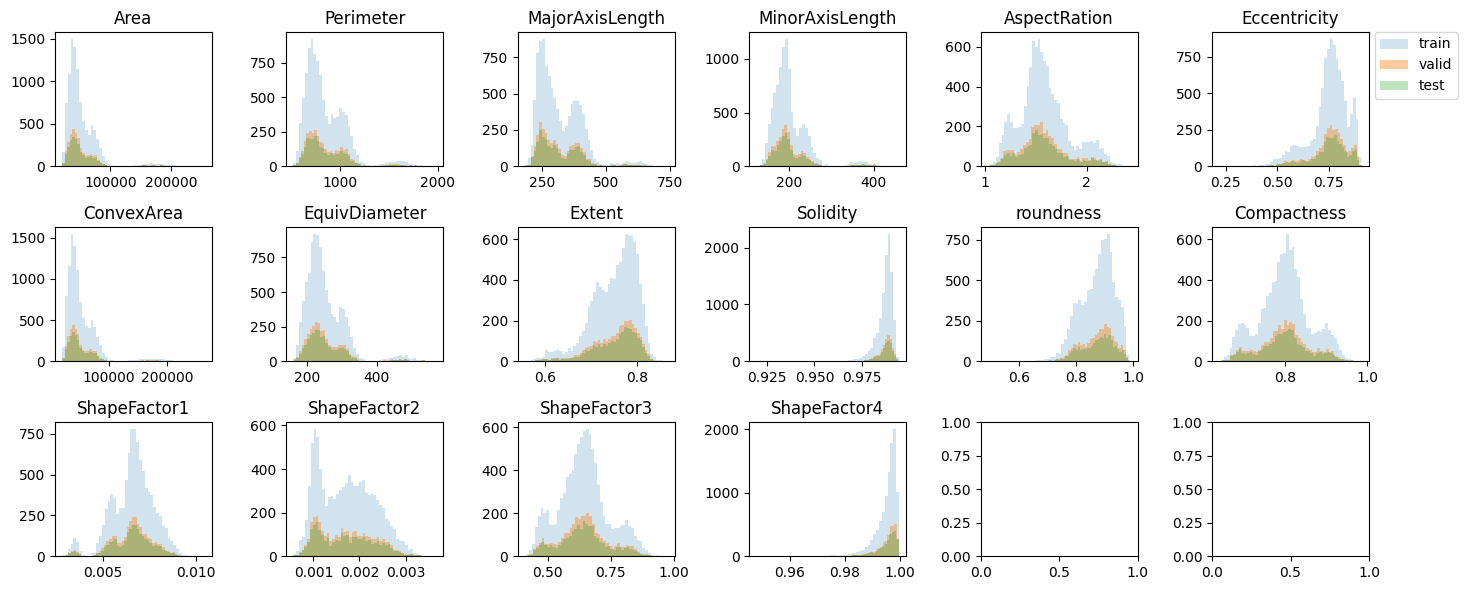

In [18]:
# Check the distribution of the training set, validation set, and test set
# For each feature, overlay the histograms of the three sets on the same subplot

# TODO: create a figure with 3 rows and 6 columns

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(14, 6), facecolor='white', constrained_layout=True)


for ax, col in zip(axes.flat, all_features):
    ax.hist(train_X[col], bins=50, alpha=0.2, label='train')
    ax.hist(valid_X[col], bins=50, alpha=0.4, label='valid')
    ax.hist(test_X[col], bins=50, alpha=0.3, label='test')
    ax.set_title(col)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.05, 0.95))

plt.tight_layout()
plt.show()


Check the label distribution in the training, validation, and test sets.

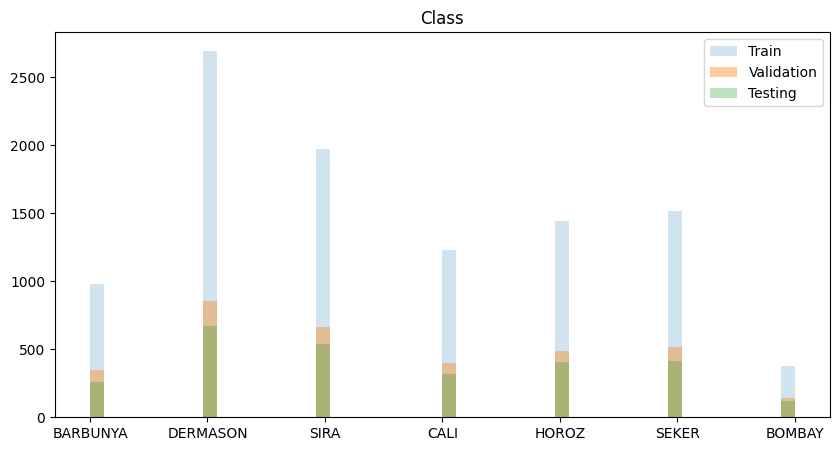

In [19]:
# TODO: check the label distribution of the training set, validation set, and test set
# overlay the histograms of the three sets (fill in the blank)

plt.figure(figsize=(10, 5))
plt.hist(train_y, bins=50, alpha=0.2, label="Train")
plt.hist(valid_y, bins=50, alpha=0.4, label="Validation")
plt.hist(test_y, bins=50, alpha=0.3, label="Testing")
plt.title(label)
plt.legend()
plt.show()


## Create Preprocessing Pipeline

 - Use log transformation to reduce skewness
 - Standardize the data using StandardScaler
 - drop low correlation features

`ColumnTransformer` allows us to apply different preprocessing steps to different columns in the dataset. It is particularly useful when we have a dataset when we want to apply specific transformations to specific subsets of features.

In [20]:
# Create log_transformer to apply log transformation to the data
# using `FunctionTransformer()` and `np.log()` function
log_transformer = FunctionTransformer(np.log, validate=True)

In [21]:
# parameters for the preprocess pipelines
# A list of features to apply for log transformation and standardization
# Another list of features to apply for standardization
log_scale_features = ['Area']
scale_features = ['AspectRation', 'Eccentricity',  'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

# Create a preprocess pipeline
# use `ColumnTransformer()` to apply the log_transformer and StandardScaler() to the features
#  - use `log_std_scaler` as the name for the log_transformer and StandardScaler() pipeline
#  - use `std_scaler` as the name for the StandardScaler() only pipeline
# use `remainder='drop'` to drop the columns that are not specified in the lists above
preprocess_pipeline = ColumnTransformer(
    [
        ('log_std_scaler', Pipeline([('log_scaler', log_transformer),
                                     ('std_scaler', StandardScaler())]
                                   ),  log_scale_features),
        ("std_scaler", StandardScaler(), scale_features),
    ],
    remainder="drop")

Use the full pipeline to transform the training and validation data

In [22]:
# TODO: fit the pipeline to the training set and transform it (fill in the blank)
train_X = preprocess_pipeline.fit_transform(train_X)

# TODO: transform the validation
valid_X = preprocess_pipeline.fit_transform(valid_X)

# Train and Evaluate Models

This perhaps is the easier part of the workflow in terms of coding. Scikit-learn provides a wide range of machine learning tools that we can use to train and evaluate our data. Their APIs are very consistent. We can use the same code to train and evaluate different models by simply changing the model class.

Before we start, we will implement an evaluation function. This function `predict_and_print_metrics` takes a multiclass classifier model, input features (X), target values (y), and a dataset name. It then predicts the target values using the model, calculates and prints the accuracy and confusion matrix.

Accuracy computes as the proportion of true results ($y_i == \hat{y_i}$) among the total number of samples examined. It is calculated as $\frac{\sum_i^N(y_i == \hat{y_i})}{total\_num\_samples}$.

Confusion matrix is a table that summarizes the performance of a classification model. It compares the actual values with the predicted values.


In [23]:
#TODO: import the accuracy_score and confusion_matrix functions (fill in the blank)
from sklearn.metrics import accuracy_score,confusion_matrix

def plot_confusion_matrix(cm: np.ndarray, classes: list, cmap=plt.cm.Blues) -> None:
    """
    This function plots the confusion matrix using seaborn.
    """
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# TODO: create a function to predict the target values and print the metrics
# include accuracy and confusion matrix
def predict_and_print_metrics(model, X: np.ndarray, y: np.ndarray, name: str) -> None:
    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)

    classes = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    cm = confusion_matrix(y, y_pred, labels=classes)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")

    print(f"Confusion Matrix:\n")
    plot_confusion_matrix(cm, classes)

Train a Decision Tree model. The training can be done in three lines of code. First, we import the model class from the Scikit-Learn library. Then, we create an instance of the model class. Third, we call the `fit` method of the model instance to train the model. The `fit` method takes in the training features and labels as arguments. The model learns the patterns and relationships within the data. Then, we use the trained model to predict the target values for the training and validation set, and we evaluate the model using the evaluation metrics mentioned above.

Model: Train
Accuracy: 0.9273
Confusion Matrix:



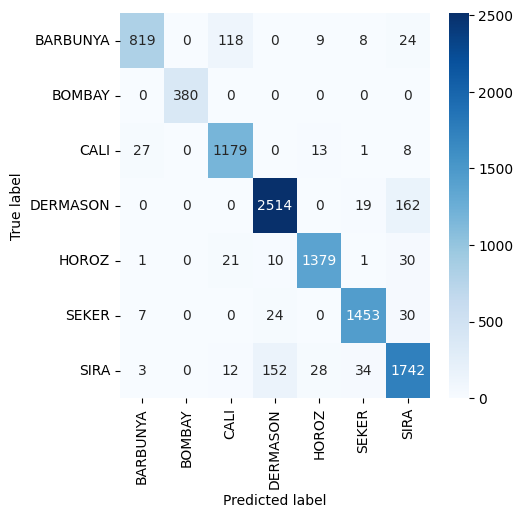

Model: Valid
Accuracy: 0.9030
Confusion Matrix:



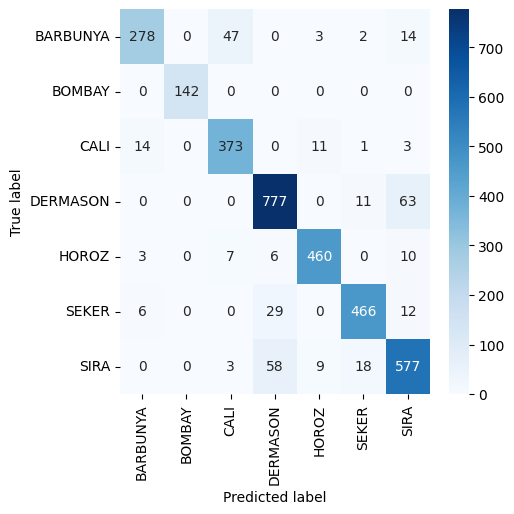

In [24]:
# TODO: import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# TODO: instantiate and train the model
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(train_X, train_y)

# Evaluate the model on the training set and validation set
predict_and_print_metrics(tree_clf, train_X, train_y, "Train")
predict_and_print_metrics(tree_clf, valid_X, valid_y, "Valid")

We will train and evaluate other models (K-Nearest Neighbors Classifier and Logistic Regression). We will use the same code to train and evaluate different models by simply changing the model class.

Model: Training
Accuracy: 0.9305
Confusion Matrix:



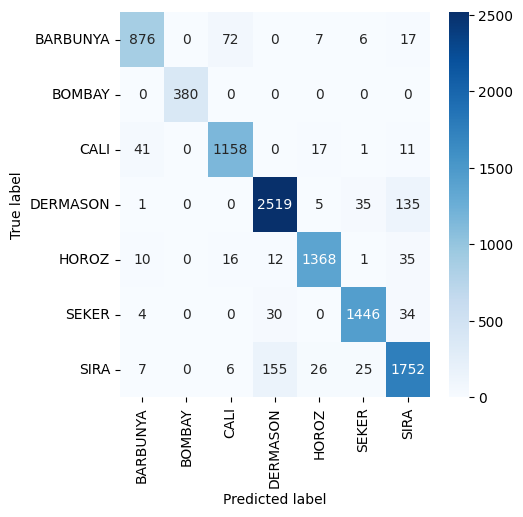

Model: valid
Accuracy: 0.9077
Confusion Matrix:



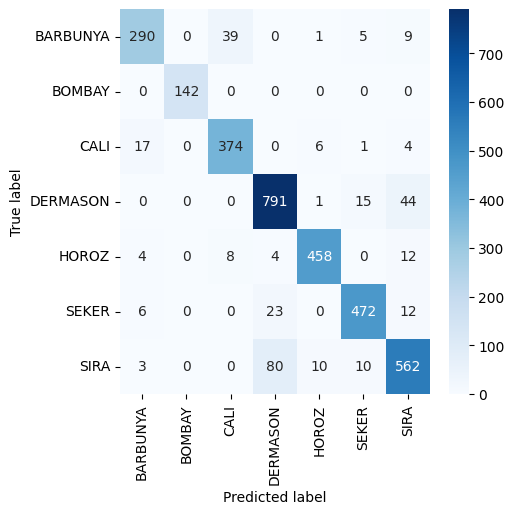

In [25]:
# Import the k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# TODO: instantiate and train the model
neigh = KNeighborsClassifier()
neigh.fit(train_X, train_y)

# TODO: evaluate the model on the training set and validation set

predict_and_print_metrics(neigh,train_X, train_y, "Training")
predict_and_print_metrics(neigh,valid_X, valid_y,'valid')

Model: Training Set
Accuracy: 0.9125
Confusion Matrix:



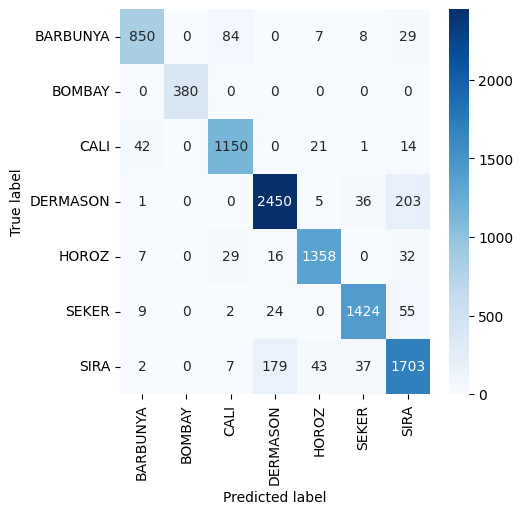

Model: Validation Set
Accuracy: 0.9130
Confusion Matrix:



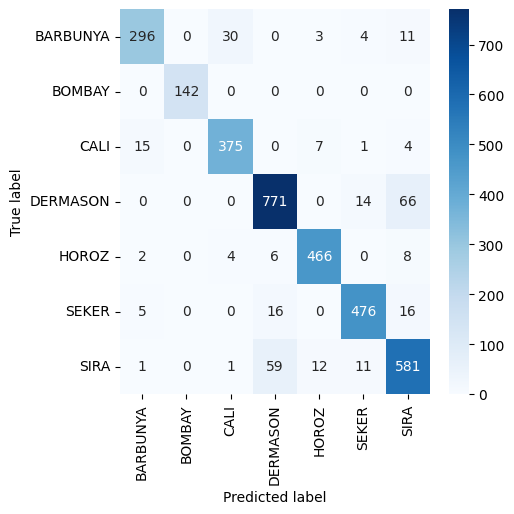

In [26]:
# Import the logistic regression classifier
from sklearn.linear_model import LogisticRegression

# TODO: instantiate and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000) 
log_reg.fit(train_X, train_y)

# TODO: evaluate the model on the training set and validation set
predict_and_print_metrics(log_reg, train_X, train_y, "Training Set")
predict_and_print_metrics(log_reg, valid_X, valid_y, "Validation Set")


In the case where the model has hyperparameters, we can either write our own code to search for the best hyperparameters or use Scikit-Learn's `GridSearchCV` class to search for the best hyperparameters. We start off by writing our own code to search for the best hyperparameters.

depth: 2, train score: 0.5924764890282131, valid score: 0.587422862180429
depth: 4, train score: 0.8262147335423198, valid score: 0.8213341169556274
depth: 6, train score: 0.9058581504702194, valid score: 0.8950925653834851
depth: 8, train score: 0.9273119122257053, valid score: 0.9021451660299735
depth: 10, train score: 0.947884012539185, valid score: 0.8977372906259183
depth: 12, train score: 0.9672805642633229, valid score: 0.8912724066999707
depth: 14, train score: 0.9823667711598746, valid score: 0.8827505142521305
depth: 16, train score: 0.9904976489028213, valid score: 0.8818689391713195
depth: 18, train score: 0.9953957680250783, valid score: 0.8821627975315898
depth: 20, train score: 0.9974529780564263, valid score: 0.8783426388480752
depth: 22, train score: 0.9986285266457681, valid score: 0.8795180722891566
depth: 24, train score: 0.9996081504702194, valid score: 0.8759917719659124
depth: 26, train score: 0.9999020376175548, valid score: 0.8768733470467235
depth: 28, train s

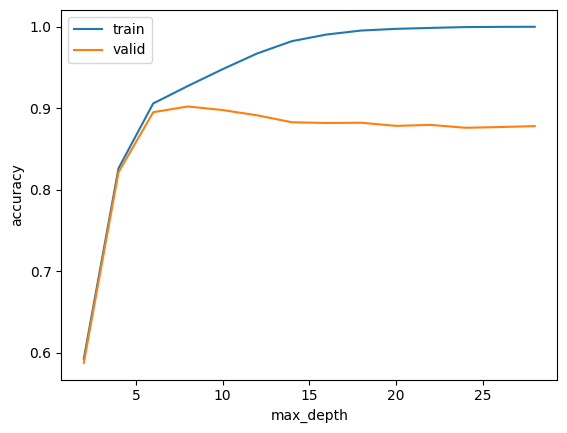

In [27]:
# train a decision tree classifier with search for the best hyperparameters

train_scores = []
valid_scores = []
depths = range(2,30,2)
for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree_clf.fit(train_X, train_y)

    train_y_pred = tree_clf.predict(train_X)
    train_acc = accuracy_score(train_y, train_y_pred)
    train_scores.append(train_acc)

    valid_y_pred = tree_clf.predict(valid_X)
    valid_acc = accuracy_score(valid_y, valid_y_pred)
    valid_scores.append(valid_acc)

# plot the learning curves
plt.plot(depths, train_scores, label='train')
plt.plot(depths, valid_scores, label='valid')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# print the depths and the corresponding scores
for depth, train_score, valid_score in zip(depths, train_scores, valid_scores):
    print(f'depth: {depth}, train score: {train_score}, valid score: {valid_score}')

Use `GridSearchCV` to search for the best hyperparameters. `GridSearchCV` takes in the model class, hyperparameter grid, evaluation metric (scorer), and the number of folds as arguments. It then searches for the best hyperparameters based on the evaluation metric. We will use the same evaluation metric as before, accuracy. We will combine the training and evaluation data into one dataset. This is because `GridSearchCV` uses cross-validation to evaluate the model. We will use 5-fold cross-validation, which means that the dataset will be split into 5 folds. The model will be trained and evaluated 5 times, each time using a different fold as the evaluation set. The final evaluation metric will be the average of the 5 evaluations.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Combine the train and validation sets for GridSearchCV
train_valid_X = np.concatenate([train_X, valid_X])
train_valid_y = np.concatenate([train_y, valid_y])

# TODO: Specify the parameter grid for the grid search (fill in the blank)
param_grid = {
    'max_depth': range(1,100,1),
}


# TODO: Make the metric a scorer using make_scorer (fill in the blank)
scorer = make_scorer(accuracy_score, greater_is_better=True)


# TODO: Create the DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the GridSearchCV object with custom scoring (fill in the blank)
grid_search = GridSearchCV(
    estimator = tree_clf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5  # You can specify the number of folds for cross-validation
)

# TODO: Fit the grid search to your data

grid_search.fit(train_valid_X,train_valid_y)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the results
print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")

best_index = grid_search.best_index_
print(grid_search.cv_results_['mean_test_score'])

Best Model: DecisionTreeClassifier(max_depth=8, random_state=42)
Best Parameters: {'max_depth': 8}
[0.41069713 0.59767798 0.71354009 0.82176186 0.87524778 0.89354137
 0.90059509 0.90206422 0.90110888 0.89861098 0.89662731 0.89486398
 0.89185176 0.88957432 0.88803123 0.88413736 0.8867087  0.88332916
 0.88560678 0.88347621 0.88450492 0.8845049  0.88252103 0.88193339
 0.88171305 0.88068447 0.88090503 0.88127241 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894 0.88119894
 0.88119894 0.88119894 0.88119

# Putting it all together in a pipeline and export pipeline

We will now combine the preprocessing pipeline and the best model into one pipeline.

In [29]:
# TODO: combine the preprocessing pipeline and the best model into a new pipeline
pipeline = Pipeline([
    ('preprocess', preprocess_pipeline),
    ('model', best_model)
])

Save the pipeline using `joblib.dump` and load it back for predicting the test set

In [30]:
# TODO: save the pipeline
joblib.dump(pipeline, './pipelines/drybean_pipeline.joblib')

['./pipelines/drybean_pipeline.joblib']

Model: Test
Accuracy: 0.9284
Confusion Matrix:



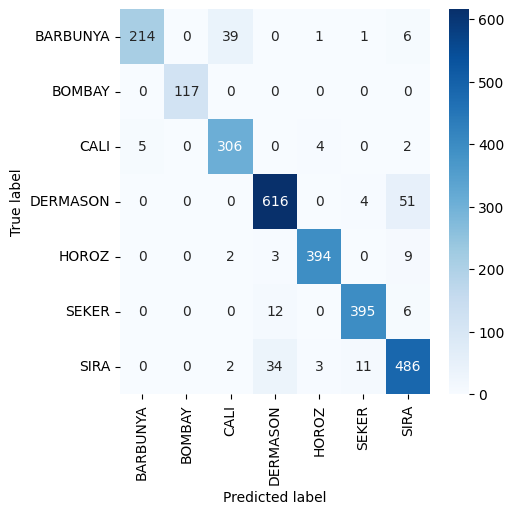

In [31]:
# TODO: load the pipeline
pipeline = joblib.load('./pipelines/drybean_pipeline.joblib')

# TODO: evaluate the pipeline on the test set

predict_and_print_metrics(pipeline, test_X, test_y, 'Test')
